In [1]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import stlearn as st

def clusterMap(adata, color='leiden', ax=None):
    sc.pl.embedding(adata, "spatial", color=color, s=20, ax=ax, show=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')

/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [2]:
adata = ad.read_h5ad('adata_tumor.h5ad')

In [3]:
celltypes = ['Tumor','Tumor','Tumor','Proliferating Tumor','Tumor','Tumor',
             'Epithelial Tumor','Cytotoxic T/NK','Tumor','Basal-like BrCa',
             'Basal-like BrCa with Macrophage']

In [4]:
cluster_to_celltype = {str(i): celltypes[i] for i in range(len(celltypes))}
adata.obs['celltype'] = adata.obs['leiden_0.25'].map(cluster_to_celltype)

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1294: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1294: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1294: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing

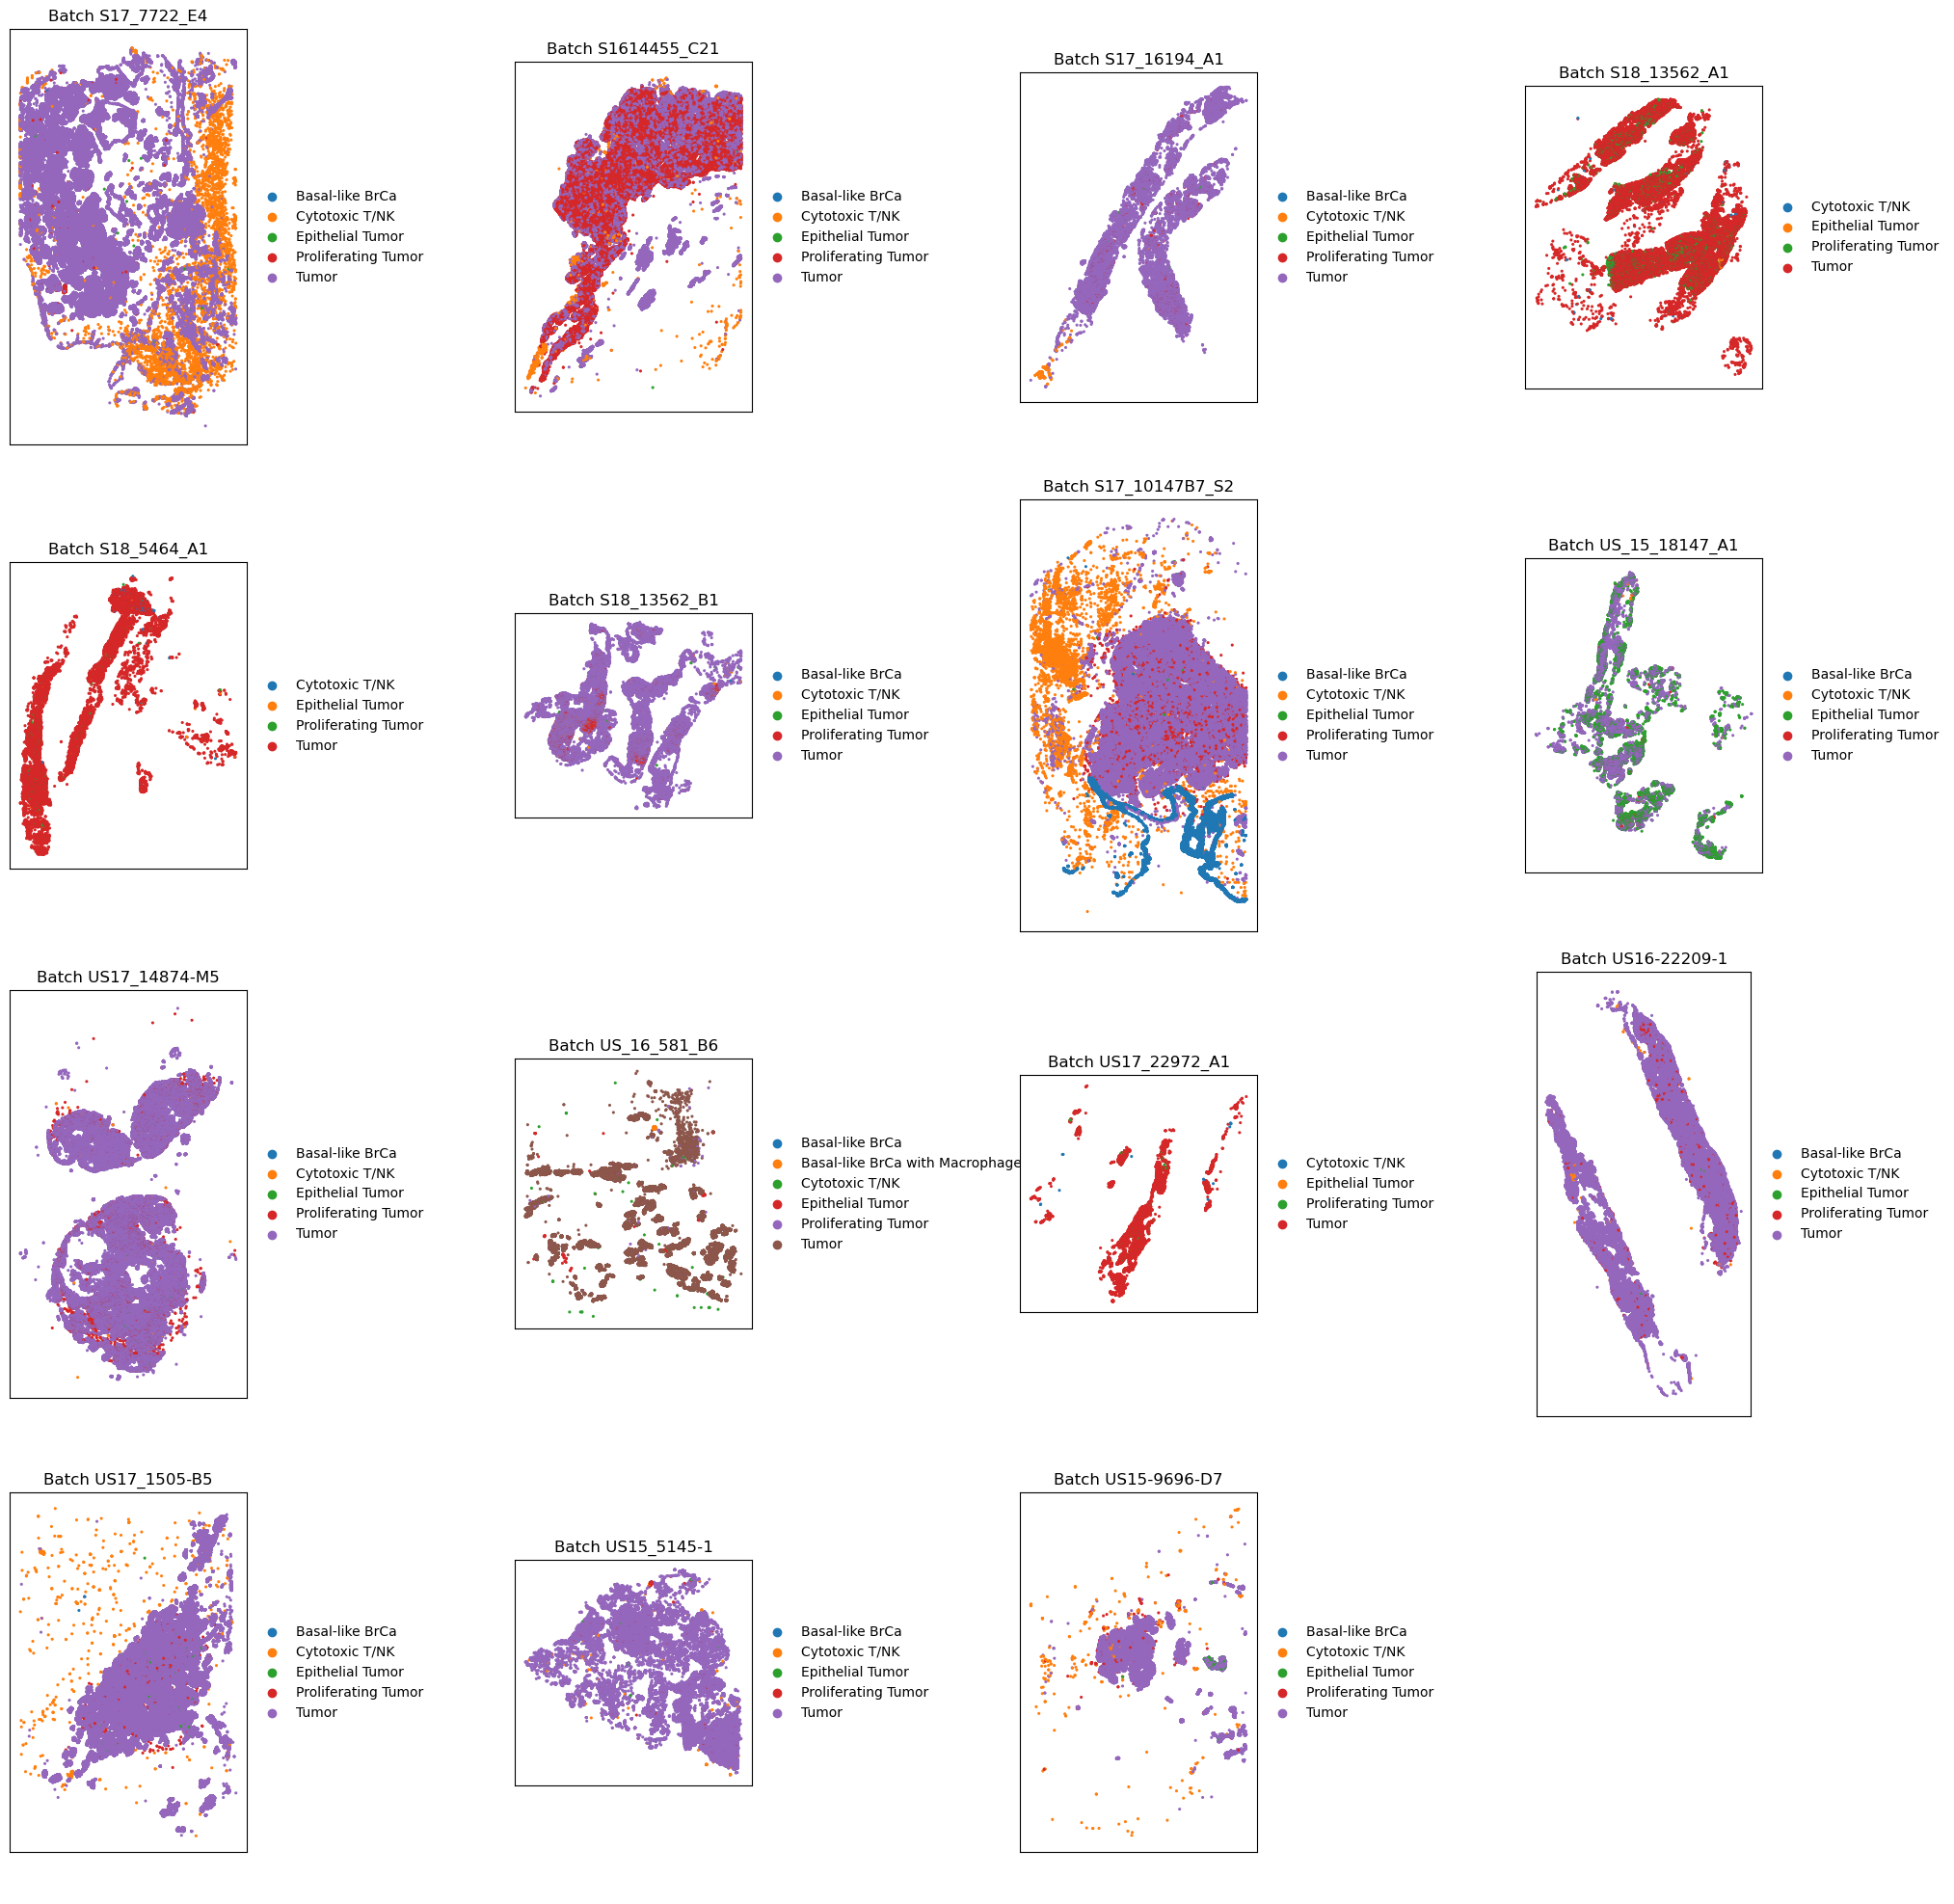

In [5]:
# Get unique batches
batches = adata.obs['batch'].unique()
# Determine the grid size
num_batches = len(batches)
grid_size = (4, 4)  # Adjust this based on the number of batches and your preference
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
# Loop through the batches and create subplots
for i, batch in enumerate(batches):
    row = i // grid_size[1]
    col = i % grid_size[1]
    ax = axes[row, col]
    clusterMap(adata[adata.obs['batch'] == batch], color='celltype', ax=ax)
    ax.set_title(f'Batch {batch}')
# Turn off axes for any remaining empty subplots
for j in range(num_batches, grid_size[0] * grid_size[1]):
    row = j // grid_size[1]
    col = j % grid_size[1]
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [6]:
adata.write_h5ad('adata_tumor.h5ad')